In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve

import warnings
warnings.filterwarnings('ignore')

# Problem Statemet

# Data Gathering

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Domain Knowledge

# Exploratorary Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### age

In [5]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [6]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### sex

In [8]:
df['sex']

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
df['sex'].value_counts().to_dict()

{1: 207, 0: 96}

In [11]:
sex_dict = {'male':1, 'female':0}
sex_dict

{'male': 1, 'female': 0}

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### cp

In [13]:
df['cp']

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

In [14]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [15]:
df['cp'].value_counts().to_dict()

{0: 143, 2: 87, 1: 50, 3: 23}

In [16]:
cp_dict = {'typical angina':0,'atypical angina':1,'non-anginal pain':2,'asymptomatic':3}
cp_dict

{'typical angina': 0,
 'atypical angina': 1,
 'non-anginal pain': 2,
 'asymptomatic': 3}

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### trestbps

In [18]:
df['trestbps']

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64

In [19]:
df['trestbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### chol

In [21]:
df['chol']

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64

In [22]:
df['chol'].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### fbs

In [24]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [25]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [26]:
df['fbs'].value_counts().to_dict()

{0: 258, 1: 45}

In [27]:
fbs_dict = {'lower':0, 'higher':1}
fbs_dict

{'lower': 0, 'higher': 1}

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### restecg

In [29]:
df['restecg']

0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64

In [30]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [31]:
df['restecg'].value_counts().to_dict()


{1: 152, 0: 147, 2: 4}

In [32]:
restecg_dict = {'abnormal':0,'normal':1,'hyper':2}
restecg_dict

{'abnormal': 0, 'normal': 1, 'hyper': 2}

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### thalach

In [34]:
df['thalach']

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

In [35]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### exang

In [37]:
df['exang']

0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exang, Length: 303, dtype: int64

In [38]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [39]:
df['exang'].value_counts().to_dict()

{0: 204, 1: 99}

In [40]:
exang_dict = {'no':0,'yes':1}
exang_dict

{'no': 0, 'yes': 1}

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### oldpeak

In [42]:
df['oldpeak']

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [43]:
df['oldpeak'].value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### slope

In [45]:
df['slope']

0      0
1      0
2      2
3      2
4      2
      ..
298    1
299    1
300    1
301    1
302    1
Name: slope, Length: 303, dtype: int64

In [46]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [47]:
df['slope'].value_counts().to_dict()

{2: 142, 1: 140, 0: 21}

In [48]:
slope_dict = {'up':0,'flat':1,'down':2}
slope_dict

{'up': 0, 'flat': 1, 'down': 2}

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### ca

In [50]:
df['ca']

0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    2
301    1
302    1
Name: ca, Length: 303, dtype: int64

In [51]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [52]:
df['ca'].value_counts().to_dict()

{0: 175, 1: 65, 2: 38, 3: 20, 4: 5}

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### thal

In [54]:
df['thal']

0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3
301    3
302    2
Name: thal, Length: 303, dtype: int64

In [55]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [56]:
df['thal'].value_counts().to_dict()

{2: 166, 3: 117, 1: 18, 0: 2}

In [57]:
thal_dict = {'normal':2,'fixed defect':1,'reversable defect':0}
thal_dict

{'normal': 2, 'fixed defect': 1, 'reversable defect': 0}

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
# df['target'].value_counts()   # imbalance data  # bais data

In [60]:
# df['target'].replace({0:'no',1:'yes'},inplace = True)

# Feature Engineering

<AxesSubplot:>

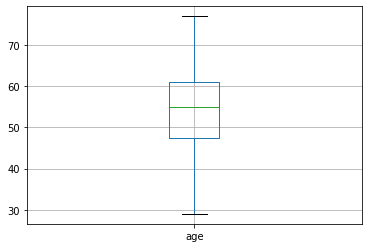

In [61]:
df[['age']].boxplot()

<AxesSubplot:>

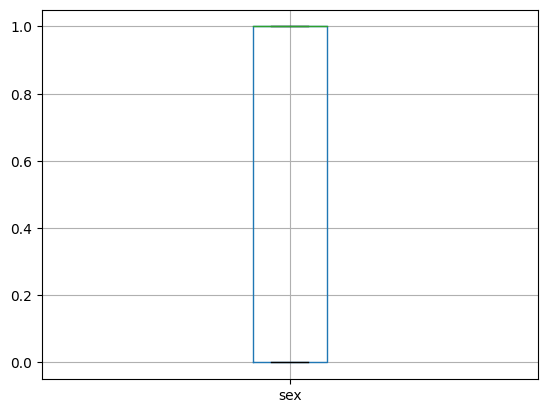

In [62]:
df[['sex']].boxplot()

<AxesSubplot:>

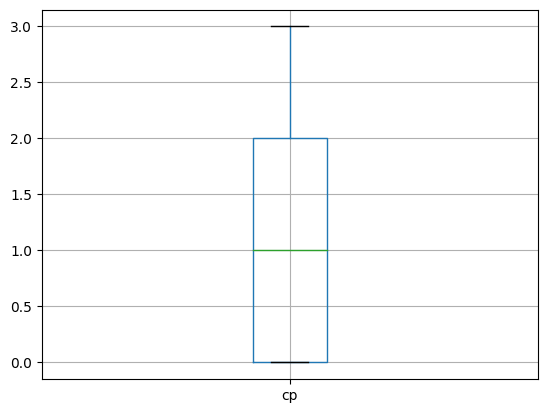

In [63]:
df[['cp']].boxplot()

<AxesSubplot:>

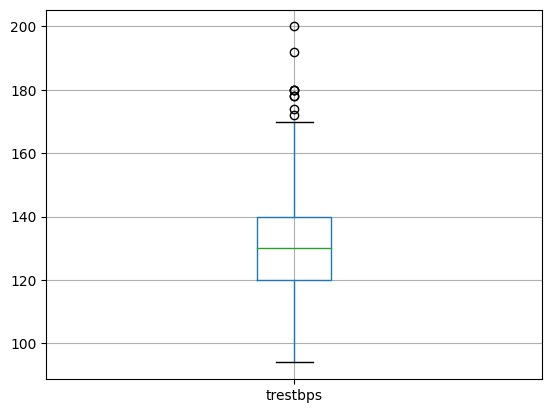

In [64]:
df[['trestbps']].boxplot()

q1--> 120.0
q2--> 130.0
q3--> 140.0
upper_tail--> 170.0
lower_tail--> 90.0
mean--> 131.62376237623764
130.0


<AxesSubplot:>

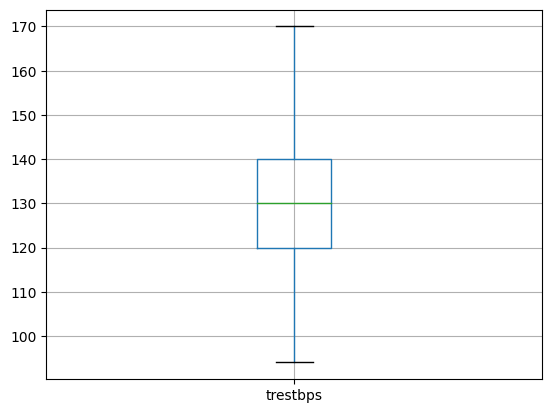

In [65]:
q1=df['trestbps'].quantile(0.25)
q2=df['trestbps'].quantile(0.50)
q3=df['trestbps'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['trestbps'].mean()))

df['trestbps'].median()

size_df=df[['trestbps']].loc[(df['trestbps'] < upper_tail) & 
                                   (df['trestbps'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['trestbps'] > upper_tail) |
                (df['trestbps'] < lower_tail), 'trestbps'] = size_df


df[['trestbps']].boxplot()

<AxesSubplot:>

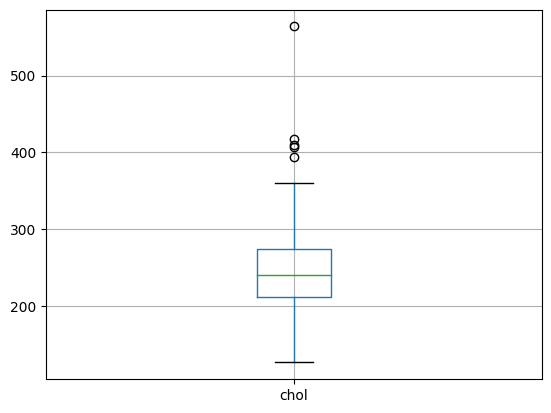

In [66]:
df[['chol']].boxplot()

q1--> 211.0
q2--> 240.0
q3--> 274.5
upper_tail--> 369.75
lower_tail--> 115.75
mean--> 246.26402640264027
240.0


<AxesSubplot:>

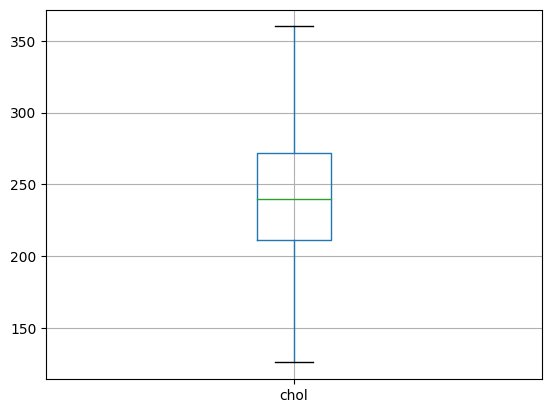

In [67]:
q1=df['chol'].quantile(0.25)
q2=df['chol'].quantile(0.50)
q3=df['chol'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['chol'].mean()))

df['chol'].median()

size_df=df[['chol']].loc[(df['chol'] < upper_tail) & 
                                   (df['chol'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['chol'] > upper_tail) |
                (df['chol'] < lower_tail), 'chol'] = size_df


df[['chol']].boxplot()

<AxesSubplot:>

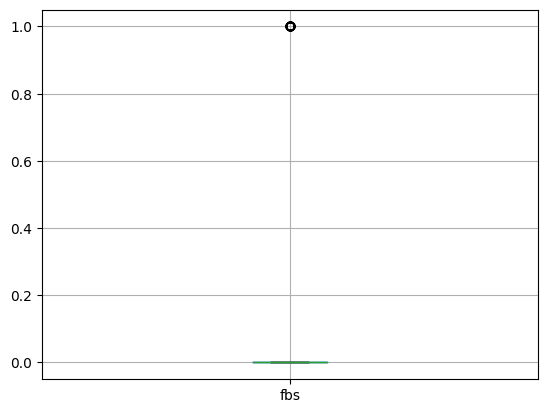

In [68]:
df[['fbs']].boxplot()

<AxesSubplot:>

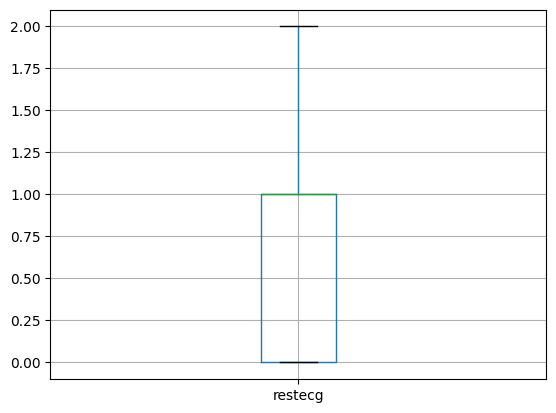

In [69]:
df[['restecg']].boxplot()

<AxesSubplot:>

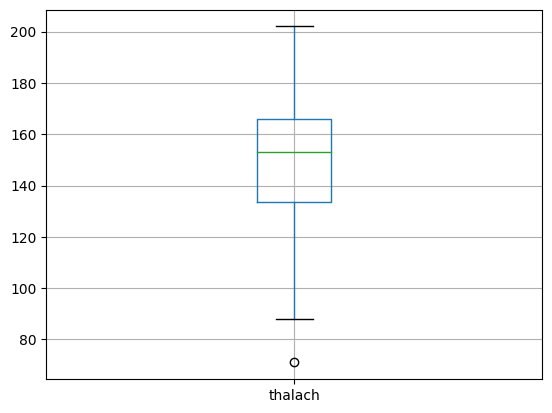

In [70]:
df[['thalach']].boxplot()

q1--> 133.5
q2--> 153.0
q3--> 166.0
upper_tail--> 214.75
lower_tail--> 84.75
mean--> 149.64686468646866
153.0


<AxesSubplot:>

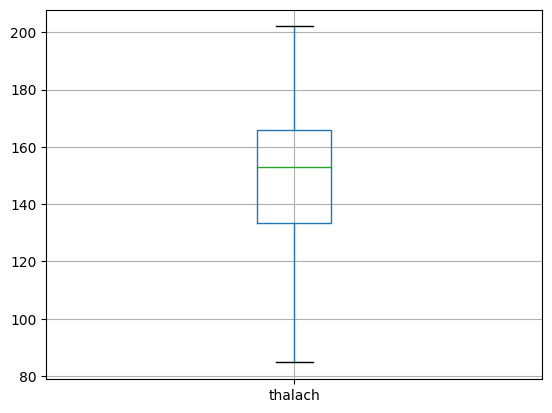

In [71]:
q1=df['thalach'].quantile(0.25)
q2=df['thalach'].quantile(0.50)
q3=df['thalach'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['thalach'].mean()))

df['thalach'].median()

size_df=df[['thalach']].loc[(df['thalach'] < upper_tail) & 
                                   (df['thalach'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['thalach'] > upper_tail) |
                (df['thalach'] < lower_tail), 'thalach'] = lower_tail


df[['thalach']].boxplot()

<AxesSubplot:>

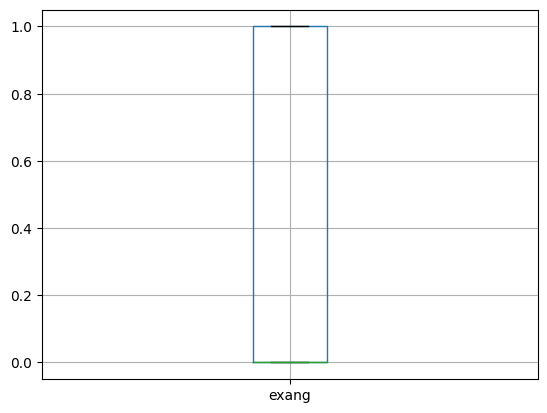

In [72]:
df[['exang']].boxplot()

<AxesSubplot:>

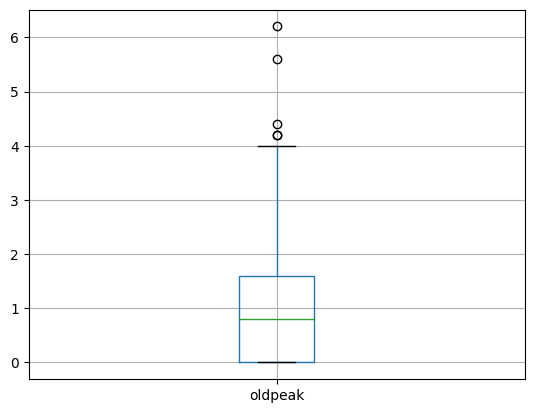

In [73]:
df[['oldpeak']].boxplot()

q1--> 0.0
q2--> 0.8
q3--> 1.6
upper_tail--> 4.0
lower_tail--> -2.4000000000000004
mean--> 1.0396039603960396
0.6


<AxesSubplot:>

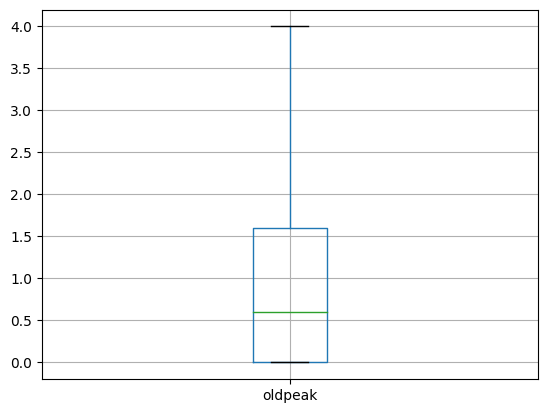

In [74]:
q1=df['oldpeak'].quantile(0.25)
q2=df['oldpeak'].quantile(0.50)
q3=df['oldpeak'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['oldpeak'].mean()))

df['oldpeak'].median()

size_df=df[['oldpeak']].loc[(df['oldpeak'] < upper_tail) & 
                                   (df['oldpeak'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['oldpeak'] > upper_tail) |
                (df['oldpeak'] < lower_tail), 'oldpeak'] = size_df


df[['oldpeak']].boxplot()

<AxesSubplot:>

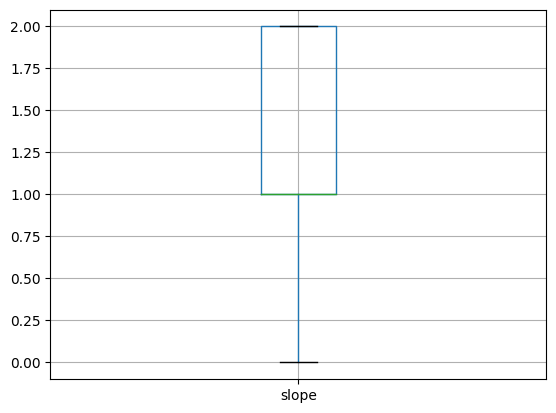

In [75]:
df[['slope']].boxplot()

<AxesSubplot:>

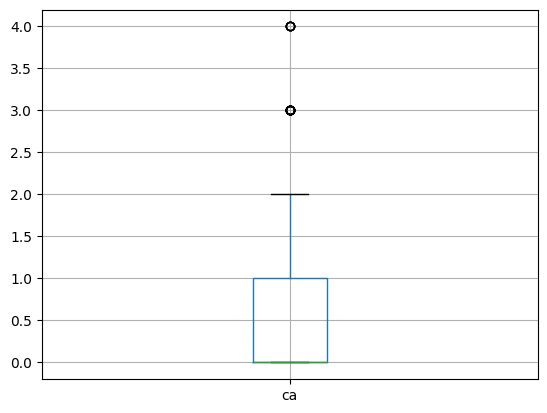

In [76]:
df[['ca']].boxplot()

q1--> 0.0
q2--> 0.0
q3--> 1.0
upper_tail--> 2.5
lower_tail--> -1.5
mean--> 0.7293729372937293
0.0


<AxesSubplot:>

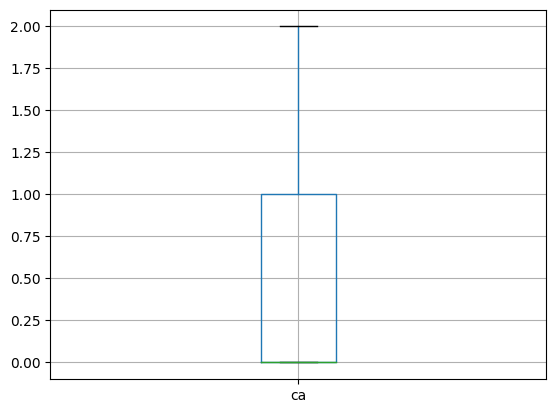

In [77]:
q1=df['ca'].quantile(0.25)
q2=df['ca'].quantile(0.50)
q3=df['ca'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['ca'].mean()))

df['ca'].median()

size_df=df[['ca']].loc[(df['ca'] < upper_tail) & 
                                   (df['ca'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['ca'] > upper_tail) |
                (df['ca'] < lower_tail), 'ca'] = size_df


df[['ca']].boxplot()

<AxesSubplot:>

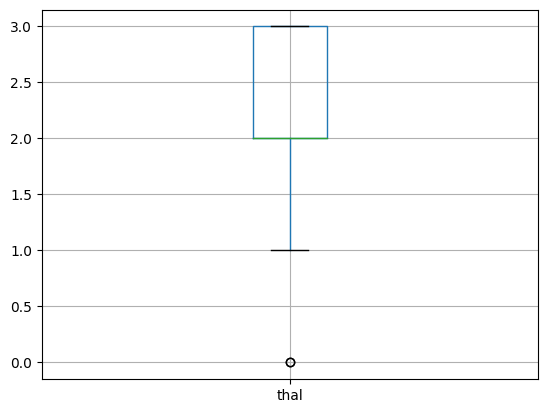

In [78]:
df[['thal']].boxplot()

q1--> 2.0
q2--> 2.0
q3--> 3.0
upper_tail--> 4.5
lower_tail--> 0.5
mean--> 2.3135313531353137
2.0


<AxesSubplot:>

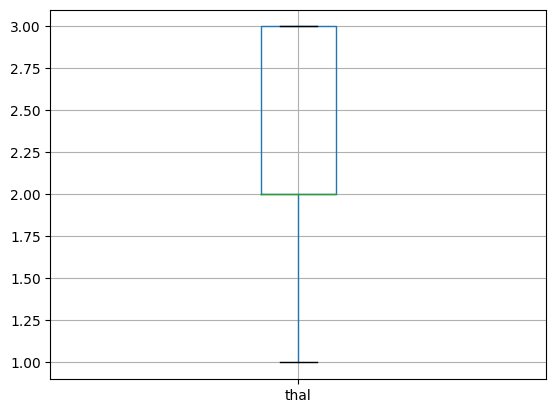

In [79]:
q1=df['thal'].quantile(0.25)
q2=df['thal'].quantile(0.50)
q3=df['thal'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['thal'].mean()))

df['thal'].median()

size_df=df[['thal']].loc[(df['thal'] < upper_tail) & 
                                   (df['thal'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['thal'] > upper_tail) |
                (df['thal'] < lower_tail), 'thal'] = size_df


df[['thal']].boxplot()

# Feature Selection

In [80]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.271469,0.175342,0.121308,-0.116211,-0.398246,0.096801,0.211533,-0.168814,0.316359,0.066745,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.011801,-0.121806,0.045032,-0.058196,-0.042937,0.141664,0.098601,-0.030711,0.036865,0.211652,-0.280937
cp,-0.068653,-0.049353,1.000000,0.067629,-0.092265,0.094444,0.044421,0.295748,-0.394280,-0.135233,0.119717,-0.187366,-0.169125,0.433798
trestbps,0.271469,-0.011801,0.067629,1.000000,0.090445,0.119097,-0.148485,-0.065321,0.003658,0.142574,-0.087785,0.030592,0.007076,-0.118564
chol,0.175342,-0.121806,-0.092265,0.090445,1.000000,0.009208,-0.101369,-0.033248,0.102073,0.012005,0.021603,0.072046,0.059137,-0.115910
fbs,0.121308,0.045032,0.094444,0.119097,0.009208,1.000000,-0.084189,-0.009455,0.025665,0.035026,-0.059894,0.105819,-0.011209,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.148485,-0.101369,-0.084189,1.000000,0.046196,-0.070733,-0.094463,0.093045,-0.084094,-0.013795,0.137230
thalach,-0.398246,-0.042937,0.295748,-0.065321,-0.033248,-0.009455,0.046196,1.000000,-0.382586,-0.333934,0.387921,-0.169224,-0.117156,0.422210
exang,0.096801,0.141664,-0.394280,0.003658,0.102073,0.025665,-0.070733,-0.382586,1.000000,0.310747,-0.257748,0.178502,0.225508,-0.436757
oldpeak,0.211533,0.098601,-0.135233,0.142574,0.012005,0.035026,-0.094463,-0.333934,0.310747,1.000000,-0.506265,0.265581,0.196434,-0.427945


<AxesSubplot:>

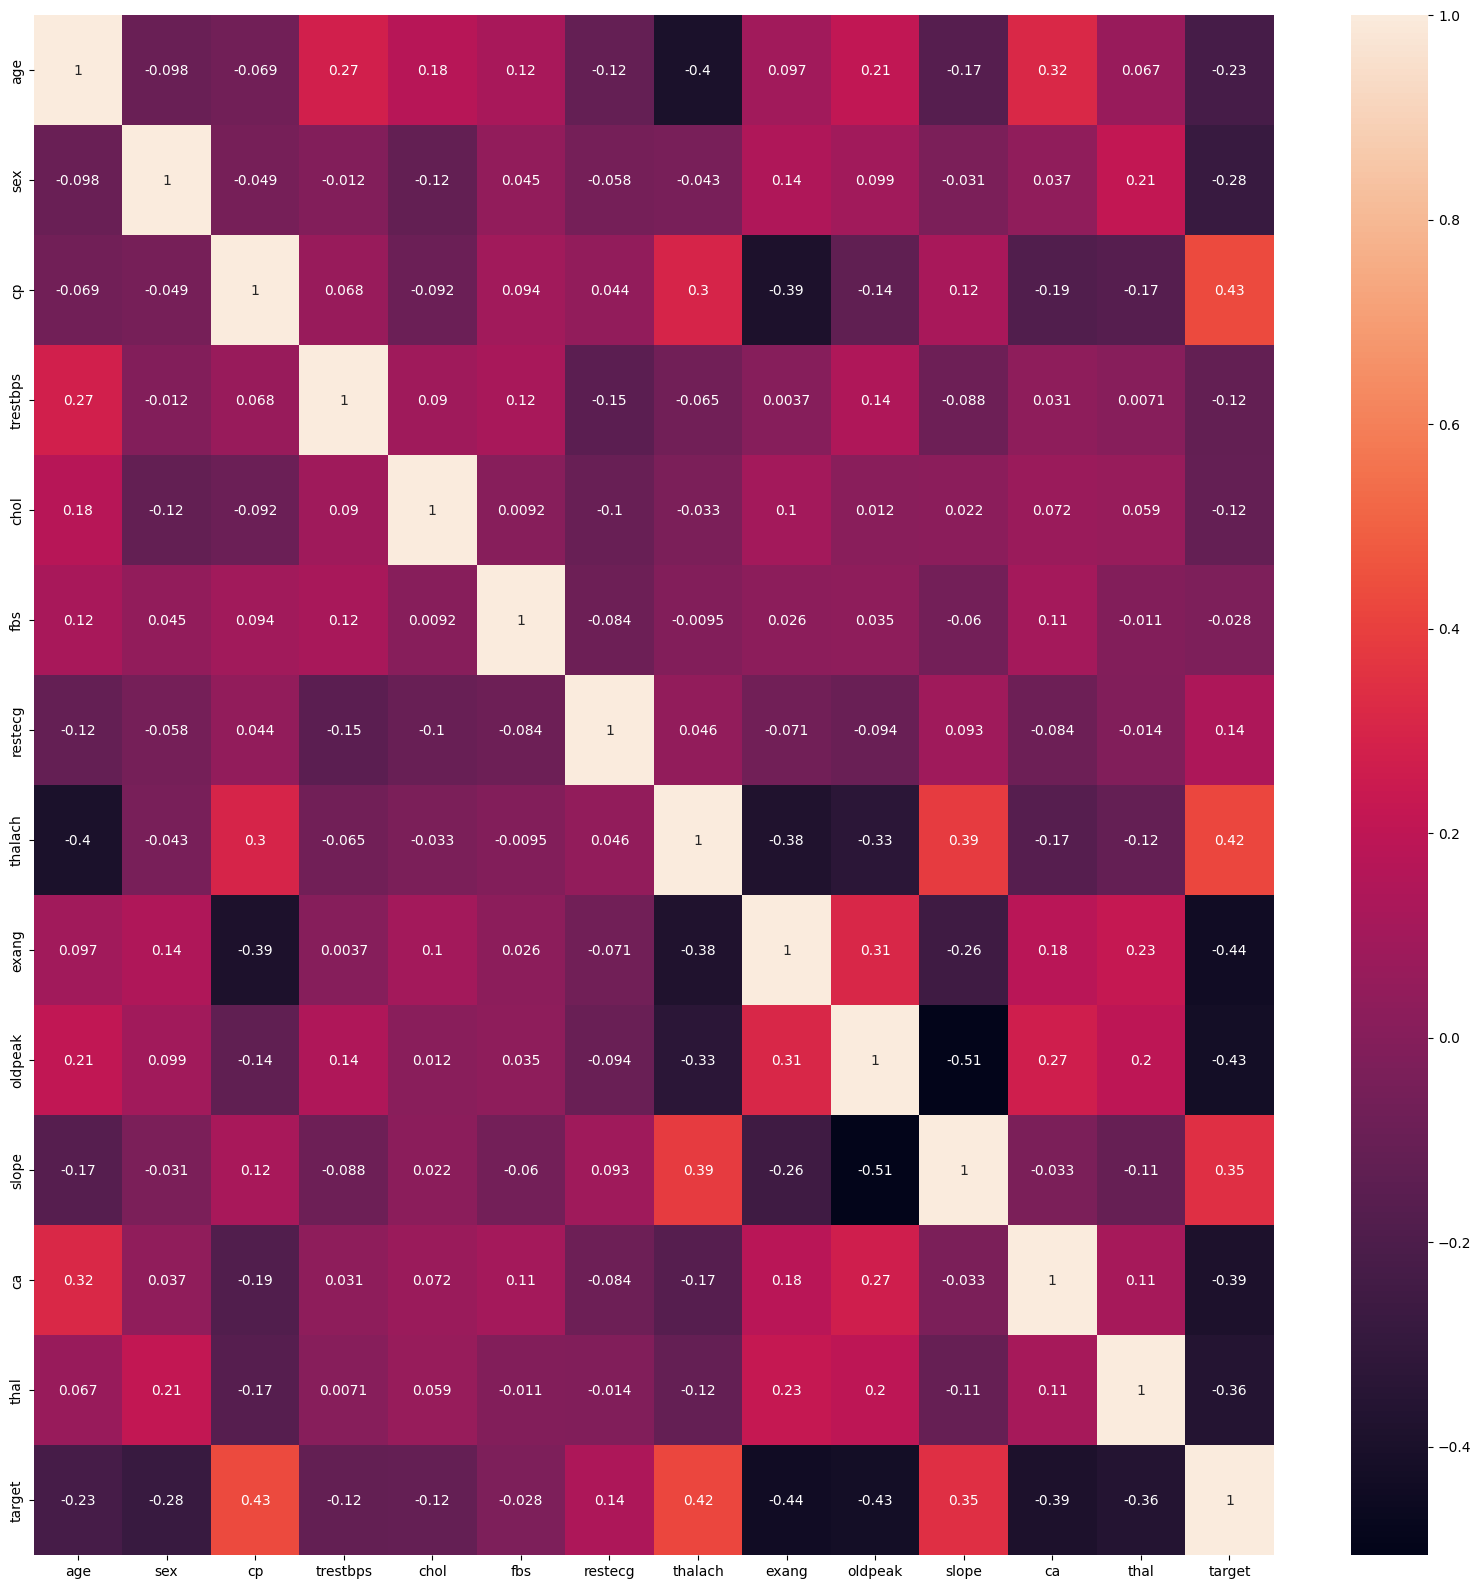

In [81]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

# Model Training

In [82]:
x = df.drop('target',axis = 1)
y = df['target']

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1,stratify =y)

In [84]:
heart_model = LogisticRegression()
heart_model.fit(x_train,y_train)

LogisticRegression()

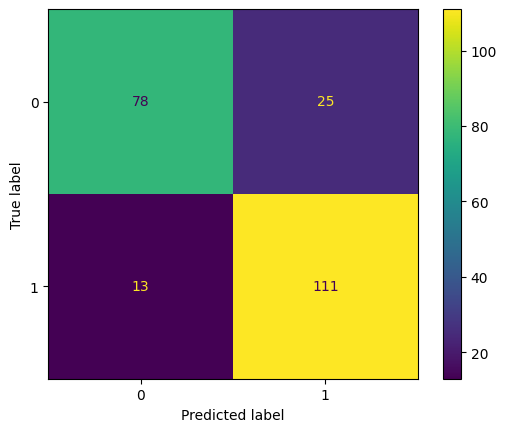

In [85]:
# Training Data
plot_confusion_matrix(heart_model, x_train, y_train)

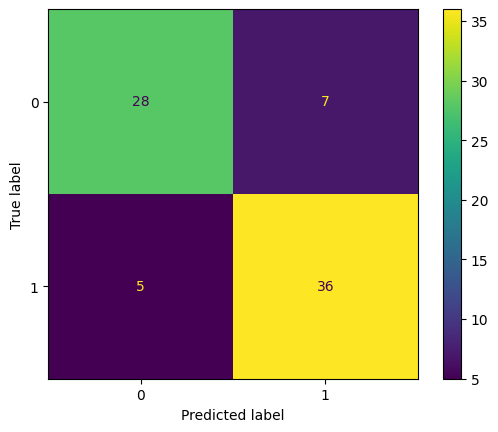

In [86]:
# Training Data
plot_confusion_matrix(heart_model, x_test, y_test)

In [87]:
# Training Accuracy
heart_model.score(x_train, y_train)

0.8325991189427313

In [88]:
# Testing Accuracy
heart_model.score(x_test, y_test)

0.8421052631578947

# Model Evaluation

In [89]:
# # prediction
y_pred = heart_model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [90]:
# prediction probability
y_pred_proba = heart_model.predict_proba(x_test)
y_pred_proba

array([[0.25878945, 0.74121055],
       [0.88748189, 0.11251811],
       [0.99440544, 0.00559456],
       [0.90810914, 0.09189086],
       [0.75688835, 0.24311165],
       [0.42173673, 0.57826327],
       [0.97598787, 0.02401213],
       [0.56853603, 0.43146397],
       [0.78499759, 0.21500241],
       [0.21579228, 0.78420772],
       [0.90606746, 0.09393254],
       [0.7999674 , 0.2000326 ],
       [0.0492705 , 0.9507295 ],
       [0.71952055, 0.28047945],
       [0.64149381, 0.35850619],
       [0.27416205, 0.72583795],
       [0.86425362, 0.13574638],
       [0.14098164, 0.85901836],
       [0.20338878, 0.79661122],
       [0.16869282, 0.83130718],
       [0.29436398, 0.70563602],
       [0.06610403, 0.93389597],
       [0.97644427, 0.02355573],
       [0.30924929, 0.69075071],
       [0.99651001, 0.00348999],
       [0.97659746, 0.02340254],
       [0.98216333, 0.01783667],
       [0.6418405 , 0.3581595 ],
       [0.20946703, 0.79053297],
       [0.05457833, 0.94542167],
       [0.

In [91]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[28  7]
 [ 5 36]]
*********************************************
Accuracy Score: 0.8421052631578947
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [92]:
# Training data

# prediction
y_pred_train = heart_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[ 78  25]
 [ 13 111]]
*********************************************
Accuracy Score: 0.8325991189427313
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.80       103
           1       0.82      0.90      0.85       124

    accuracy                           0.83       227
   macro avg       0.84      0.83      0.83       227
weighted avg       0.83      0.83      0.83       227



# AUC-ROC Curve

In [121]:
# prediction probability
y_pred_proba = heart_model.predict_proba(x_train)
y_pred_proba[:,1]  # We are getting class 1 probability

array([0.60970126, 0.20783493, 0.26367956, 0.64941455, 0.66362252,
       0.94992154, 0.92254584, 0.70792811, 0.00264416, 0.6923153 ,
       0.46526634, 0.89028906, 0.47125362, 0.85751775, 0.89433845,
       0.79600858, 0.91444139, 0.9324016 , 0.69899697, 0.30639575,
       0.6030316 , 0.06170338, 0.94913735, 0.88003708, 0.47248109,
       0.00370009, 0.98543988, 0.85376164, 0.05398579, 0.01490457,
       0.91071947, 0.78290624, 0.0928801 , 0.94012986, 0.73189009,
       0.97872693, 0.65891211, 0.96366206, 0.81635657, 0.57929986,
       0.00140628, 0.62944965, 0.95757665, 0.75817295, 0.52003595,
       0.27412561, 0.86885088, 0.83426635, 0.26940215, 0.71034122,
       0.92214096, 0.0439403 , 0.96552786, 0.02747789, 0.82271792,
       0.98050621, 0.85067667, 0.94283712, 0.87904174, 0.93273427,
       0.15645778, 0.44049867, 0.94283213, 0.29305688, 0.03626297,
       0.04604632, 0.86522917, 0.20070257, 0.86995836, 0.96345833,
       0.18509339, 0.88358272, 0.93314904, 0.56394802, 0.62524

In [122]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics')

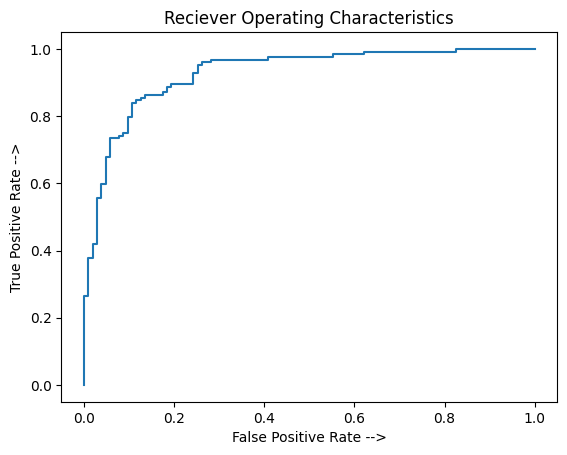

In [123]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

# Training on single row

In [124]:
x.head(1).T

,0
age,63.0
sex,1.0
cp,3.0
trestbps,145.0
chol,233.0
fbs,1.0
restecg,0.0
thalach,150.0
exang,0.0
oldpeak,2.3


In [125]:
x.head(1).T.shape

(13, 1)

In [126]:
columns = x.columns
print(columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [127]:
len(columns)

13

In [128]:
sex_dict = {'male':1, 'female':0}
cp_dict = {'typical angina':0,'atypical angina':1,'non-anginal pain':2,'asymptomatic':3}
fbs_dict = {'lower':0, 'higher':1}
restecg_dict = {'abnormal':0,'normal':1,'hyper':2}
exang_dict = {'no':0,'yes':1}
slope_dict = {'up':0,'flat':1,'down':2}
thal_dict = {'normal':2,'fixed defect':1,'reversable defect':0}

In [129]:
# user intput
age = 63
sex = 'male'
cp = 'typical angina'
trestbps= 145
chol = 233
fbs = 'lower'
restecg = 'abnormal'
thalach = 150
exang = 'no'
oldpeak = 2.3
slope = 'up'
ca = 1
thal = 'normal'


In [130]:
columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [131]:
array = np.zeros(columns.shape[0],dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [132]:
len(columns)

13

In [133]:
array = np.zeros(columns.shape[0],dtype = int)
array[0] = age
array[1] = sex_dict[sex]
array[2] = cp_dict[cp]
array[3] = trestbps
array[4] = chol
array[5] = fbs_dict[fbs]
array[6] = restecg_dict[restecg]
array[7] = thalach
array[8] = exang_dict[exang]
array[9] = oldpeak
array[10] = slope_dict[slope]
array[11] = ca
array[12] = thal_dict[thal]

array

array([ 63,   1,   0, 145, 233,   0,   0, 150,   0,   2,   0,   1,   2])

In [134]:
predicted_disease = heart_model.predict([array])[0]
if predicted_disease == 1:
    print('yes patient has a heart disease')
else:
    print('patient has not a heart disease')
# print(f"{predicted_disease} patient has a heart disease")

patient has not a heart disease


In [135]:
# store all this column is json 
json_heart_data  = {"sex_dict":sex_dict,"cp_dict":cp_dict,
                       "fbs_dict":fbs_dict,"restecg_dict":restecg_dict,
                       "exang_dict":exang_dict,"slope_dict":slope_dict,
                    'thal_dict':thal_dict,"columns":list(columns)}
json_heart_data

{'sex_dict': {'male': 1, 'female': 0},
 'cp_dict': {'typical angina': 0,
  'atypical angina': 1,
  'non-anginal pain': 2,
  'asymptomatic': 3},
 'fbs_dict': {'lower': 0, 'higher': 1},
 'restecg_dict': {'abnormal': 0, 'normal': 1, 'hyper': 2},
 'exang_dict': {'no': 0, 'yes': 1},
 'slope_dict': {'up': 0, 'flat': 1, 'down': 2},
 'thal_dict': {'normal': 2, 'fixed defect': 1, 'reversable defect': 0},
 'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [136]:
import json

with open("json_auto_data.json", "w") as f:
    json.dump(json_heart_data, f)

In [137]:
# Save Model in Pickle File
import pickle

with open("heart_model.pkl", "wb") as f:
    pickle.dump(heart_model, f)